# Import Libraries & Data

***Import Packages & Libraries***

In [193]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [194]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [195]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

# Data Understanding

In [196]:
df.head()
df.columns
len(df)

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


Index(['Comments'], dtype='object')

9546

In [197]:
print(df)

                                               Comments
0     I just bought this projector and i am clueless...
1     You promised me a multi card reader for leavin...
2     Hello Apeman, your team is not responding to m...
3     Great picture, I am so excited about looking f...
4     I have just bought the Apeman 550 dashcam and ...
...                                                 ...
9541  Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542  4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543  📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544  #autobrighttech #AutobrightTech #caraccessorie...
9545  📷 #autobrighttech #AutobrightTech #caraccessor...

[9546 rows x 1 columns]


# Tex Preprocessing

In [198]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [199]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['Comments'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [200]:
dfs

0    I just bought this protector and i am careless...
1    You promised me a multi card reader for leavin...
2    Hello Apeman, your team is not responding to m...
3    Great picture, I am so excited about looking f...
4    I have just bought the Apeman 550 dashcam and ...
Name: Comments, dtype: object

In [201]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

# AFINN Lexicon

In [202]:
lex_file = open("AFINN-111.csv")

In [203]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Comments
tokens
['Comments']
['comments']
word_list
[['comments']]


In [204]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [205]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'\ufeffabandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3

In [206]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [207]:
senti_matrix = pd.DataFrame(strength, corpus)

# Lexicon Score

In [208]:
senti_matrix[0:10]

,0
bought projector clueless connect iphon,-2
promis multi card reader leav review im still wait susi,0
hello apeman team respond email fix issu multipl follow up,0
great pictur excit look k camerajust need price come littl look forward futur adventur run camera thejogshop brighton runningrunp puresportsperformac ukrunchat,3
bought apeman dashcam find rear camer cabl metr short anyon got idea get short extens,0
possibl tri,0
price,0
terribl compani product china,0
sayhidden design hid,-1
hello camera apeman app use wifi,0


In [209]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Lexicon_AFINN.xlsx')
senti_matrix.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA

In [210]:
dflex = pd.read_excel('/content/export_User_Comments_Lexicon_Score_Category_Model.xlsx')
dflex.info()
dflex.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserComments  9540 non-null   object
 1   Score         9540 non-null   int64 
 2   Category      9540 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 223.7+ KB


(9540, 3)

In [211]:
dflex.head()
dflex.tail()

,UserComments,Score,Category
0,bought projector clueless connect iphon,-2,0
1,promis multi card reader leav review im still ...,1,1
2,hello apeman team respond email fix issu multi...,1,1
3,great pictur excit look k camerajust need pric...,3,1
4,bought apeman dashcam find rear camer cabl met...,1,1


,UserComments,Score,Category
9535,see fun begin xboxnintendoswitch playstat,4,1
9536,inch fhd p dvr camera recorderwhatsappwechat a...,0,0
9537,inch fhd p dvr camera record whatsappwechat au...,0,0
9538,autobrighttech autobrighttech caraccessori aut...,0,0
9539,autobrighttech autobrighttech caraccessori aut...,0,0


In [212]:
dflex.groupby('Score').size()

Score
-11       1
-9        1
-8        1
-7        5
-6       13
-5        7
-4       37
-3       66
-2      213
-1      285
 0     4481
 1     2377
 2      908
 3      683
 4      194
 5      122
 6       97
 7       19
 8       12
 9        6
 10       9
 11       2
 13       1
dtype: int64

# Category

In [213]:
bins=(-6,0,8)
names=['Negative','Positive']
dflex['Category']=pd.cut(dflex['Score'],bins,labels=names)

In [214]:
dflex.groupby('Category').size()

Category
Negative    5089
Positive    4412
dtype: int64

In [215]:
dflex.columns

Index(['UserComments', 'Score', 'Category'], dtype='object')

In [216]:
dflex.columns = ['UserComments', 'Score', 'Category']

In [217]:
dflex.head(10)

,UserComments,Score,Category
0,bought projector clueless connect iphon,-2,Negative
1,promis multi card reader leav review im still ...,1,Positive
2,hello apeman team respond email fix issu multi...,1,Positive
3,great pictur excit look k camerajust need pric...,3,Positive
4,bought apeman dashcam find rear camer cabl met...,1,Positive
5,possibl tri,1,Positive
6,price,1,Positive
7,terribl compani product china,1,Positive
8,sayhidden design hid,-1,Negative
9,hello camera apeman app use wifi,1,Positive


In [218]:
pandas.isnull(dflex)

,UserComments,Score,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9535,False,False,False
9536,False,False,False
9537,False,False,False
9538,False,False,False


In [219]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dflex_series = pd.isnull(dflex["Category"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dflex[dflex_series]

,UserComments,Score,Category
25,got one christma gift set work great day love ...,10,NaN
30,got one christma gift set work great day love ...,10,NaN
281,infotain danger caus death murder war cnnisfak...,-11,NaN
694,thank littl joe fan support love carairfreshen...,10,NaN
747,happi hump day let start wednesday bad ass big...,-7,NaN
802,ride saturday night bad ass bicycleslamolog sl...,-7,NaN
821,check lanc clark clean award win usaci sq buil...,9,NaN
831,evil lurk night alexhest evil almost readi ssa...,-7,NaN
838,truckin thursday bad ass big rig slamolog slam...,-7,NaN
1088,watch first trailer red dead redempt pc gadget...,-6,NaN


In [220]:
# importing pandas module 
import pandas as pd 

# replacing na values in college with No college 
dflex["Category"].fillna("Negative", inplace = True)

dflex

,UserComments,Score,Category
0,bought projector clueless connect iphon,-2,Negative
1,promis multi card reader leav review im still ...,1,Positive
2,hello apeman team respond email fix issu multi...,1,Positive
3,great pictur excit look k camerajust need pric...,3,Positive
4,bought apeman dashcam find rear camer cabl met...,1,Positive
...,...,...,...
9535,see fun begin xboxnintendoswitch playstat,4,Positive
9536,inch fhd p dvr camera recorderwhatsappwechat a...,0,Negative
9537,inch fhd p dvr camera record whatsappwechat au...,0,Negative
9538,autobrighttech autobrighttech caraccessori aut...,0,Negative


In [221]:
dflex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   UserComments  9540 non-null   object  
 1   Score         9540 non-null   int64   
 2   Category      9540 non-null   category
dtypes: category(1), int64(1), object(1)
memory usage: 158.6+ KB


In [222]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


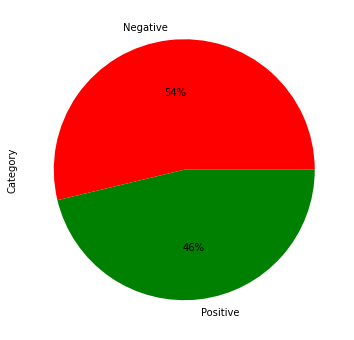

In [223]:
dflex.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])

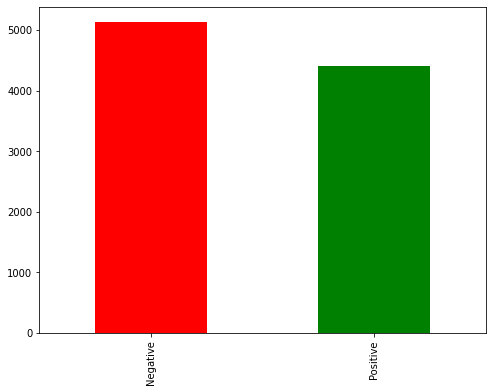

In [224]:
dflex.Category.value_counts().plot(kind='bar',  color=["red","green"])

# Label Encoding

In [225]:
#convert Polaty_type Negative, Neutral and Positive to 1, 2, 3
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [226]:
le.fit(dflex['Category'])

LabelEncoder()

In [227]:
list(le.classes_)

['Negative', 'Positive']

In [228]:
dflex_label = le.transform(dflex['Category'])

In [229]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [230]:
dflex['Category'] = dflex_label
dflex.info()
dflex.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserComments  9540 non-null   object
 1   Score         9540 non-null   int64 
 2   Category      9540 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 223.7+ KB


Index(['UserComments', 'Score', 'Category'], dtype='object')

In [231]:
dflex[3500:3520]

,UserComments,Score,Category
3500,fleec dog cloth pocket expawlor via amazingpro...,0,0
3501,dog jacket winter windproof water migohi via a...,0,0
3502,dog jacket cold weather dog cloth pe phyxin vi...,0,0
3503,reflect waterproof windproof dog co migohi via...,0,0
3504,make easi technologytechnolog tech innov engin...,0,0
3505,new video ever use weird set wash machin watch...,-2,0
3506,check tech gadget watch gadget mobil arvshop,0,0
3507,mhet live esp mini kit modul wifibluetooth int...,4,1
3508,amazon alexa smart ring wearabl gadget tool co...,1,1
3509,wireless wifi repeat mbp nbg network wifi exte...,1,1


In [232]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Lexicon_Score_Category.xlsx')
dflex.to_excel(writer,'Sheet1',index=False)
writer.save()

# Count Vectorizer

***Vectorizing Dataset using Count Vectorizer***

In [233]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [234]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [235]:
dflex['clean_comment']=dflex['UserComments'].apply(lambda x: comment_to_words(x))
dflex['comment_length']=dflex['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dflex,test_size=0.25,random_state=42)

In [236]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Classifiers

In [239]:
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.5513626834381551
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      2334
           1       0.04      0.98      0.09        51

    accuracy                           0.55      2385
   macro avg       0.52      0.76      0.39      2385
weighted avg       0.98      0.55      0.69      2385



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92f9248e48>)

([<matplotlib.axis.XTick at 0x7f92fdcc70f0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f92f9a0d470>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

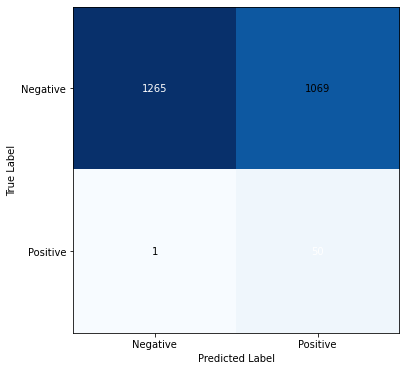

Accuracy of DecisionTreeClassifier is 0.8264150943396227
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1298
           1       0.80      0.82      0.81      1087

    accuracy                           0.83      2385
   macro avg       0.82      0.83      0.83      2385
weighted avg       0.83      0.83      0.83      2385



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92f8c59cc0>)

([<matplotlib.axis.XTick at 0x7f92f916a048>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f92f916ac50>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

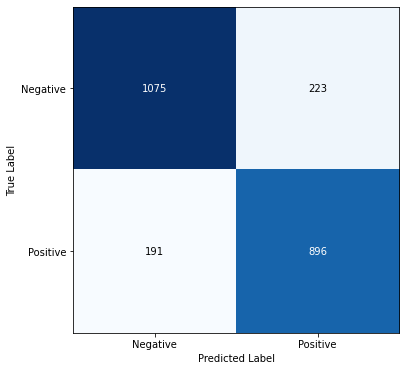

Accuracy of RandomForestClassifier is 0.8415094339622642
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1422
           1       0.76      0.88      0.82       963

    accuracy                           0.84      2385
   macro avg       0.84      0.85      0.84      2385
weighted avg       0.85      0.84      0.84      2385



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92fd1e60f0>)

([<matplotlib.axis.XTick at 0x7f92fd8d0e80>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f92fd8b4ac8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

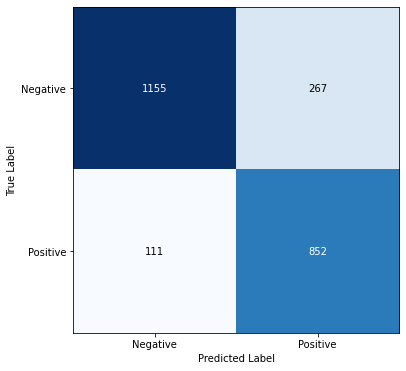

Accuracy of GradientBoostingClassifier is 0.8142557651991614
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1653
           1       0.63      0.96      0.76       732

    accuracy                           0.81      2385
   macro avg       0.80      0.86      0.80      2385
weighted avg       0.87      0.81      0.82      2385



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92f8262cf8>)

([<matplotlib.axis.XTick at 0x7f92f823fd68>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f92f95679b0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

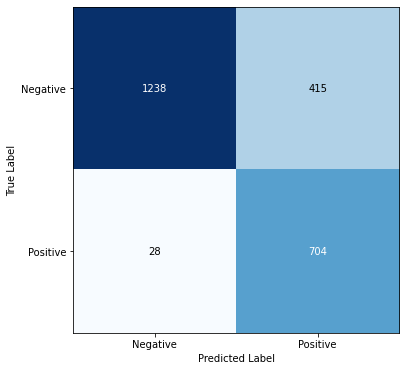

Accuracy of GaussianNB is 0.6234800838574424
              precision    recall  f1-score   support

           0       0.44      0.75      0.55       744
           1       0.83      0.57      0.67      1641

    accuracy                           0.62      2385
   macro avg       0.64      0.66      0.61      2385
weighted avg       0.71      0.62      0.64      2385



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f92f8c59f28>)

([<matplotlib.axis.XTick at 0x7f92fb39b5c0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f92fb396240>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

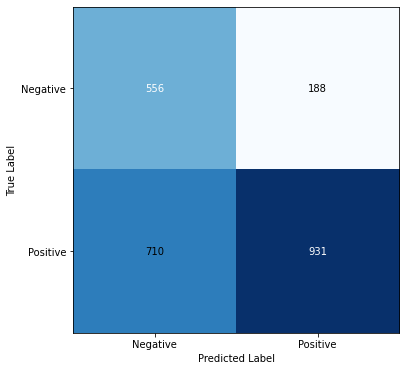

In [240]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Compare Classifiers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7f92f8b83f98>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

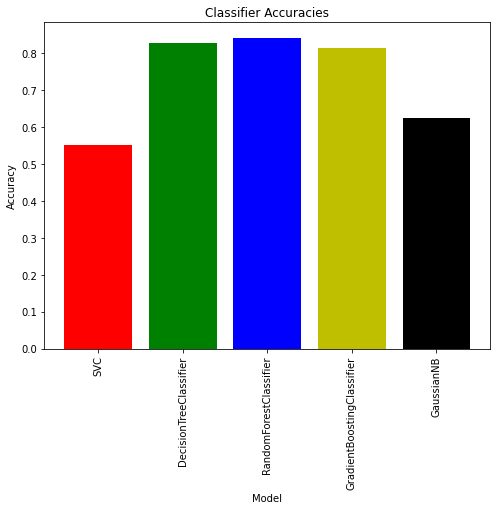

In [241]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')